# 取得脸部的特征点

此处演示以google提供的MediaPipe取回脸部特征点

In [1]:
%matplotlib inline
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

In [2]:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True, min_detection_confidence=0.5)
image = cv2.imread("./data/example/LIU.jpg")
# Convert the BGR image to RGB before processing.
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = face_mesh.process(image_rgb)

# Print and draw face mesh landmarks on the image.
annotated_image = image_rgb.copy()
for face_landmarks in results.multi_face_landmarks:
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks,
        connections=mp_face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_tesselation_style())
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks,
        connections=mp_face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks,
        connections=mp_face_mesh.FACEMESH_IRISES,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_iris_connections_style())
    print('face_landmarks:', face_landmarks)
    



face_landmarks: landmark {
  x: 0.49371433
  y: 0.6128863
  z: -0.09295805
}
landmark {
  x: 0.48869675
  y: 0.51760024
  z: -0.134069
}
landmark {
  x: 0.48957023
  y: 0.5464047
  z: -0.079887435
}
landmark {
  x: 0.4689294
  y: 0.4509698
  z: -0.08379419
}
landmark {
  x: 0.48875386
  y: 0.49483222
  z: -0.1381266
}
landmark {
  x: 0.4897652
  y: 0.46829015
  z: -0.12180259
}
landmark {
  x: 0.49271667
  y: 0.4076184
  z: -0.036672223
}
landmark {
  x: 0.3151394
  y: 0.40198004
  z: 0.06849885
}
landmark {
  x: 0.49414316
  y: 0.35936958
  z: -0.007109948
}
landmark {
  x: 0.4947959
  y: 0.3309701
  z: -0.0030460143
}
landmark {
  x: 0.49863702
  y: 0.24192435
  z: 0.053505816
}
landmark {
  x: 0.4935
  y: 0.6209316
  z: -0.091304764
}
landmark {
  x: 0.4932618
  y: 0.6292756
  z: -0.084296234
}
landmark {
  x: 0.4932089
  y: 0.63561344
  z: -0.073638864
}
landmark {
  x: 0.4926154
  y: 0.6360536
  z: -0.07691054
}
landmark {
  x: 0.49288946
  y: 0.6418745
  z: -0.08264273
}
landmark

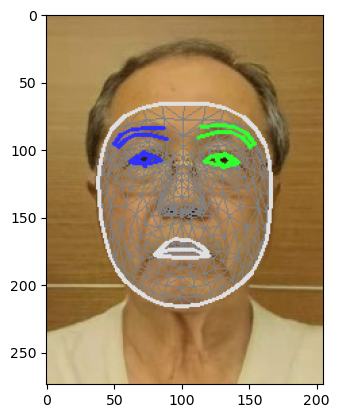

In [3]:
plt.imshow(annotated_image)
plt.show()

## 取出特定特徵點

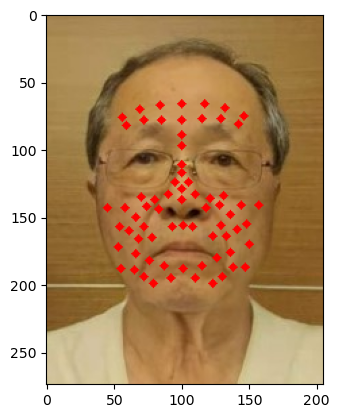

In [4]:
#列出想要用的特征点
landmarks_list = [3, 4, 5, 6, 8, 9, 10, 18, 32, 36, 43, 48, 50, 67, 69, 92, 101, 103, 104, 108, 109, 123, 134, 135, 142, 151, 164, 167, 182, 187, 192, 197, 201, 205, 206, 207, 210, 211, 212, 216, 248, 262, 266, 273, 278, 280, 297, 299, 322, 330, 332, 333, 337, 338, 352,  363, 364, 371, 393, 406, 411, 416, 421, 425, 426, 427, 430,431, 432, 436]
PRESENCE_THRESHOLD = 0.5
VISIBILITY_THRESHOLD = 0.5
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh
face_mesh =  mp_face_mesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1,
        min_detection_confidence=0.5)
results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
width = image.shape[1]
height = image.shape[0]
face_landmarks = results.multi_face_landmarks[0]
ldmks = np.zeros((468, 3), dtype=np.float32)
for idx, landmark in enumerate(face_landmarks.landmark):
    if ((landmark.HasField('visibility') and landmark.visibility < VISIBILITY_THRESHOLD)
            or (landmark.HasField('presence') and landmark.presence < PRESENCE_THRESHOLD)):
        ldmks[idx, 0] = -1.0
        ldmks[idx, 1] = -1.0
        ldmks[idx, 2] = -1.0
    else:
        coords = mp_drawing._normalized_to_pixel_coordinates(
            landmark.x, landmark.y, width, height)
        if coords:
            ldmks[idx, 0] = coords[0]
            ldmks[idx, 1] = coords[1]
            ldmks[idx, 2] = idx
        else:
            ldmks[idx, 0] = -1.0
            ldmks[idx, 1] = -1.0
            ldmks[idx, 2] = -1.0

filtered_ldmks = []
if landmarks_list is not None:
    for idx in landmarks_list:
        filtered_ldmks.append(ldmks[idx])
    filtered_ldmks = np.array(filtered_ldmks, dtype=np.float32)
else:
    filtered_ldmks = ldmks

for lm in filtered_ldmks:
    image = cv2.circle(image_rgb, (int(lm[0]),int(lm[1])), 1, (255,0,0),  3)

plt.imshow(image_rgb)
plt.show()


In [ ]:
# For webcam input:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
cap = cv2.VideoCapture(0)
with mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as face_mesh:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(image)

    # Draw the face mesh annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_face_landmarks:
      for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_tesselation_style())
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_contours_style())
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_IRISES,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_iris_connections_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Face Mesh', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()